<a href="https://colab.research.google.com/github/onotoli/Sorts/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# **Сортировки**

# **Расчёска**

In [ ]:
comb_time = pd.read_csv("comb_time.csv", delimiter=";", names=['N', 'time'])
comb_count = pd.read_csv("comb_count.csv", delimiter=";", names=['N', 'count'])
comb_time_log = np.log(comb_time)
comb_count_log = np.log(comb_count)

In [ ]:
mnk_time = np.log(comb_time.iloc[3:])

Text(0, 0.5, 'Время обработки')

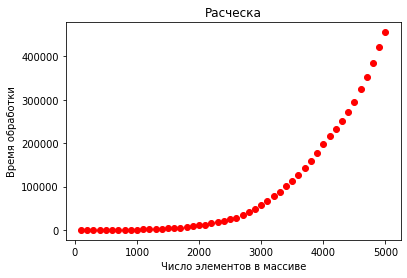

In [ ]:
a = plt.subplot()
a.scatter(comb_time['N'], comb_time['time'], color=(1, 0 , 0))
plt.title("Расческа")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Text(0, 0.5, 'Количество перестановок')

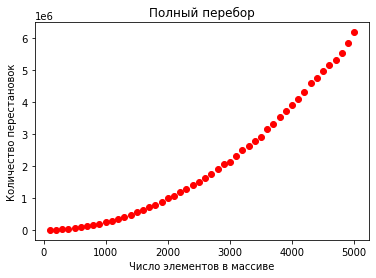

In [ ]:
a = plt.subplot()
a.scatter(comb_count['N'], comb_count['count'], color=(1, 0 , 0), alpha=1)
plt.title("Полный перебор")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Количество перестановок")

# Построим графики в логарифмических координатах

In [ ]:
def line(x, a, b):
    return a*x+b

popt, useless = curve_fit(line, mnk_time["N"].tolist(), mnk_time["time"].tolist())

a, b = popt

y = line(mnk_time['N'], a, b)
a, b

(3.9216692681895067, -20.44222465371824)

Text(0, 0.5, 'Время обработки')

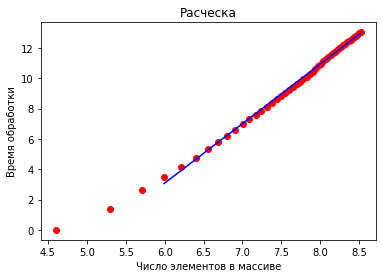

In [ ]:
a = plt.subplot()
a.scatter(comb_time_log['N'], comb_time_log['time'], color=(1, 0 , 0), alpha=1)
a.plot(mnk_time['N'], y, color=(0, 0, 1))
plt.title("Расческа")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Как понятно из коэффицинта a = 3.9 наклона графика, время имеет асимтотику O(N^4), что странно, так как асимптотика должна быть квадратичной

In [ ]:
popt, useless = curve_fit(line, comb_count_log["N"].tolist(), comb_count_log["count"].tolist())

a, b = popt

y = line(comb_count_log['N'], a, b)
a, b

(2.0109865180083055, -1.4982512948511286)

Text(0, 0.5, 'Количество перестановок')

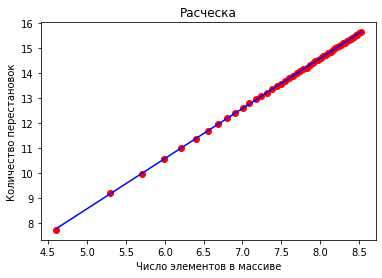

In [ ]:
a = plt.subplot()
a.scatter(comb_count_log['N'], comb_count_log['count'], color=(1, 0 , 0))
a.plot(comb_count_log['N'], y, color=(0, 0, 1))
plt.title("Расческа")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Количество перестановок")

Здесь a = 2.0, то есть количество перестановок от длины массива имеет квадратичную асимптотику, как и было предсказано теоретически

# **Сортировка Шелла**

# Определим асимптотическую сложность сортировки Шелла для разных последовательностей шагов в грубых проходах

# Начнём с последовательности, в которой каждый элемент в два раза меньше предыдущего

In [ ]:
shell1 = pd.read_csv("shell1.csv", delimiter=";", names=['N', 'time'])

Построим график зависимости времени исполнения сортировки от длины массива

Text(0, 0.5, 'Время обработки')

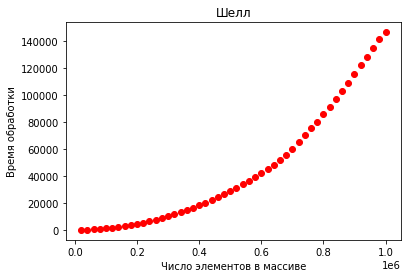

In [ ]:
a = plt.subplot()
a.scatter(shell1['N'], shell1['time'], color=(1, 0 , 0))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

In [ ]:
shell1_log = np.log(shell1)

In [ ]:
def line(x, a, b):
    return a*x+b

popt, useless = curve_fit(line, shell1_log["N"].tolist(), shell1_log["time"].tolist())

a, b = popt

y = line(shell1_log['N'], a, b)
a, b

(2.0035478907152378, -15.945889363155485)

Теперь построим график в логарифмических координатах

Text(0, 0.5, 'Время обработки')

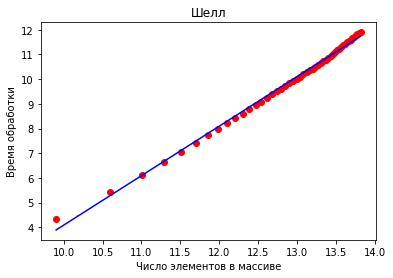

In [ ]:
a = plt.subplot()
a.scatter(shell1_log['N'], shell1_log['time'], color=(1, 0 , 0))
a.plot(shell1_log['N'], y, color=(0, 0, 1))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Коэффициент наклона графика в логарифмических координатах равен 2, значит время имеет квадратичную асимптотику, как и было предсказано теоретически

# Сделаем тоже самое, но теперь последовательностью шагов в грубых проходах будет последовательность Хиббарда

In [ ]:
shell2 = pd.read_csv("shell2.csv", delimiter=";", names=['N', 'time'])

Построим график зависимости времени исполнения сортировки от длины массива

Text(0, 0.5, 'Время обработки')

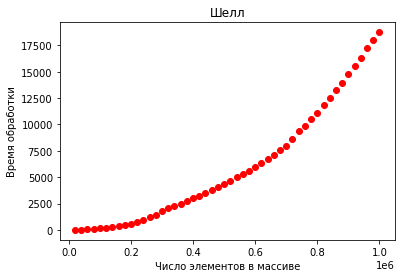

In [ ]:
a = plt.subplot()
a.scatter(shell2['N'], shell2['time'], color=(1, 0 , 0))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

In [ ]:
shell2_log = np.log(shell2)

Теперь построим график в логарифмических координатах

In [ ]:
popt, useless = curve_fit(line, shell2_log["N"].tolist(), shell2_log["time"].tolist())

a, b = popt

y = line(shell2_log['N'], a, b)
a, b

(2.0326176207874402, -18.296748411559527)

Text(0, 0.5, 'Время обработки')

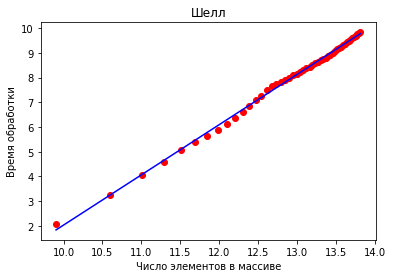

In [ ]:
a = plt.subplot()
a.scatter(shell2_log['N'], shell2_log['time'], color=(1, 0 , 0))
a.plot(shell2_log['N'], y, color=(0, 0, 1))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

В данном случае асимптотика тоже квадратичная, но алгоритм исполнился примерно в 10 раз быстрее

# Теперь проделаем тоже самое для последовательности Фиббоначи

In [ ]:
shell3 = pd.read_csv("shell3.csv", delimiter=";", names=['N', 'time'])

Построим график зависимости времени исполнения сортировки от длины массива

Text(0, 0.5, 'Время обработки')

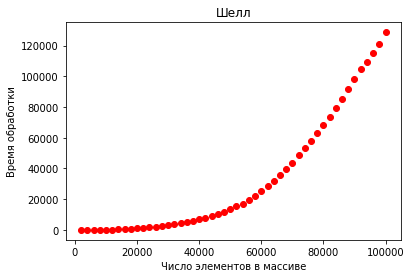

In [ ]:
a = plt.subplot()
a.scatter(shell3['N'], shell3['time'], color=(1, 0 , 0))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

In [ ]:
shell3_log = np.log(shell2)

Теперь построим график в логарифмических координатах

In [ ]:
popt, useless = curve_fit(line, shell3_log["N"].tolist(), shell3_log["time"].tolist())

a, b = popt

y = line(shell3_log['N'], a, b)
a, b

(2.0326176207874402, -18.296748411559527)

Text(0, 0.5, 'Время обработки')

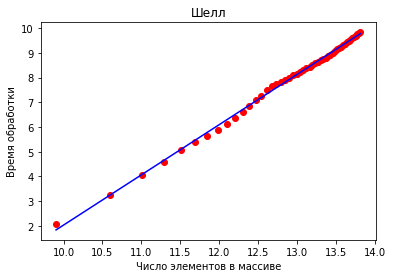

In [ ]:
a = plt.subplot()
a.scatter(shell3_log['N'], shell3_log['time'], color=(1, 0 , 0))
a.plot(shell3_log['N'], y, color=(0, 0, 1))
plt.title("Шелл")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика опять квадратичная, но данный алгоритм -- самый медленный из всех. Возможно, это связано с тем, что при каждом вызове функции компьютер заново считает последовательность Фиббоначи.